# Scalper's Statistics:  PlayStation 5
### By Lee Thomas, Taylor Johnson, Alex Peña, and Paul Leonard
#### December 2020

##### Import related libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Import data sets

In [28]:
df_ebay = pd.read_csv("./data/fake_ps5_ebay.csv")
df_msrp = pd.read_csv("./data/fake_ps5_msrp.csv")

In [29]:
df_ebay.head(5)
df_msrp.head(5)

,date,price
0,1/1/2019,400
1,1/2/2019,400
2,1/3/2019,400
3,1/4/2019,400
4,1/5/2019,400


##### Combine datafames

In [30]:
# consider combining each of the dataframes into one large one called df_ps5
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Time History Plot of PS5 Prices

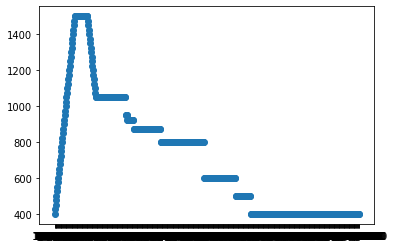

In [31]:
# dates = df_ebay["date"].values
# ebay_price = df_ebay["price"].values
# plt.scatter(dates,ebay_price)

plt.scatter(df_ebay["date"].values,df_ebay["price"].values)
plt.show()